In [288]:
import numpy as np
import pandas as pd
import copy as cp

In [289]:
def sigmoid(n):
    return (1/(1+np.exp(-n)))
def softmax(n):
    n=n-max(n)
    n=np.exp(n)
    return n/np.sum(n)

In [290]:
file=pd.read_csv("log.csv")
x=np.array(file['x'])
x.resize(1,len(x))
x=np.append(x,np.array([file['y']]),axis=0)
yt=np.array(file['yclass'])
y=np.array([])
if (yt[0]==0):
    y=np.append(y,np.array([1,0]),axis=0)
else:
     y=np.append(y,np.array([0,1]),axis=0)
y.resize([2,1])

for i in range(1,len(yt)):
    if (yt[i]==0):
        y=np.append(y,np.array([[1],[0]]),axis=1)
    else :
        y=np.append(y,np.array([[0],[1]]),axis=1)
    

In [185]:
file=pd.read_csv("4data.csv")
x=np.array(file['x1'])
x.resize(1,len(x))
x=np.append(x,np.array([file['x2']]),axis=0)
yt=np.array(file['yclass'])
y=np.array([])
if (yt[0]==1):
    y=np.append(y,np.array([1,0,0,0]),axis=0)
elif(yt[0]==2):
     y=np.append(y,np.array([0,1,0,0]),axis=0)
elif(yt[0]==3):
     y=np.append(y,np.array([0,0,1,0]),axis=0)
elif(yt[0]==4):
     y=np.append(y,np.array([0,0,0,1]),axis=0)

y.resize([4,1])

for i in range(1,len(yt)):
    if (yt[i]==1):
        y=np.append(y,np.array([[1],[0],[0],[0]]),axis=1)
    elif (yt[i]==2):
        y=np.append(y,np.array([[0],[1],[0],[0]]),axis=1)
    elif(yt[i]==3):
        y=np.append(y,np.array([[0],[0],[1],[0]]),axis=1)
    elif(yt[i]==4):
        y=np.append(y,np.array([[0],[0],[0],[1]]),axis=1)
    

In [291]:
class hidden_layer():
    def __init__(self,x,N):
        temp=np.ones([x.shape[1]])
        temp.resize(1,x.shape[1])
        temp=np.append(temp,x,axis=0)
        self.x=temp
        self.N=N
        self.w=np.ones([self.x.shape[0],self.N])
        self.z=np.dot(np.transpose(self.w),self.x)
        self.a=sigmoid(self.z)
    def out(self):
        return self.a
    def back(self,delta):
        self.delta=delta*self.a*(1-self.a)
        self.dw=np.dot(self.x,np.transpose(self.delta))
        self.w=self.w-0.001*(self.dw)
        self.deltaw=np.dot(self.w[1:self.x.shape[0],:],self.delta)
        return self.deltaw
    def forward(self):
        self.z=np.dot(np.transpose(self.w),self.x)
        self.a=sigmoid(self.z)
    def forward_(self,x):
        temp=np.ones([x.shape[1]])
        temp.resize(1,x.shape[1])
        x=np.append(temp,x,axis=0)
        self.x=x
        self.z=np.dot(np.transpose(self.w),self.x)
        self.a=sigmoid(self.z)
        return self.a

In [292]:
class final_layer():
    def __init__(self,x,N):
        temp=np.ones([x.shape[1]])
        temp.resize(1,x.shape[1])
        temp=np.append(temp,x,axis=0)
        self.x=temp
        self.N=N
        self.w=np.ones([self.x.shape[0],self.N])
        self.z=np.dot(np.transpose(self.w),self.x)
        self.a=cp.deepcopy(self.z)
        self.a=sigmoid(self.z)
    def back(self,y):
        self.delta=(self.a-y)*self.a*(1-self.a)
        self.deltaw=np.dot(self.w[1:self.x.shape[0],:],self.delta)
        self.dw=np.dot(self.delta,np.transpose(self.x))
        self.w=self.w-0.001*np.transpose(self.dw)
        return self.deltaw
    def forward_(self,x):
        temp=np.ones([x.shape[1]])
        temp.resize(1,x.shape[1])
        temp=np.append(temp,x,axis=0)
        self.x=temp
        self.z=np.dot(np.transpose(self.w),self.x)
        self.a=sigmoid(self.z)
    def out(self):
        return self.a

In [293]:
class neural_network():
    def __init__(self,x,y):
        self.num_hid_layer=int(input("Enter Number of hidden Layers"))
        self.neurons_per_layer=list();
        for i in range (self.num_hid_layer):
            print("Enter number of neurons in layer ",+i+1)
            self.neurons_per_layer.append(int(input()))
        self.layer_list=[]
        self.x=x
        self.y=y
        self.l_rate=float(input("Enter learning rate"))
        self.epoch=int(input("Enter number of epochs"))
        temp=x
        for i in range (len(self.neurons_per_layer)):
            self.layer_list.append(hidden_layer(temp,self.neurons_per_layer[i]))
            temp=self.layer_list[i].out()
        self.layer_list.append(final_layer(temp,y.shape[0]))
    def start(self):
        for i in range (self.epoch):
            for j in reversed(range (len(self.layer_list))):
                if (j==len(self.layer_list)-1):
                    temp=self.layer_list[j].back(self.y)
                else:
                    temp=self.layer_list[j].back(temp)
            for k in range (len(self.layer_list)):
                if (k==0):
                    self.layer_list[k].forward()
                    temp=self.layer_list[k].out()
                else:
                    self.layer_list[k].forward_(temp)
                    temp=self.layer_list[k].out()
        print(temp.round())

In [294]:
NN=neural_network(x,y)

Enter Number of hidden Layers2
Enter number of neurons in layer  1
3
Enter number of neurons in layer  2
2
Enter learning rate0.1
Enter number of epochs10000


In [295]:
NN.start()

[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]


In [203]:
error=l3.a-y
err=np.sum(np.square(error))
print(err)

158.3800236380373


In [162]:
a=l2.a.round()[0,:]
color1=list([])
print(a)
for i in a:
    if (i==0):
        color1.append('r')
    else:
        color1.append('b')

[1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1.

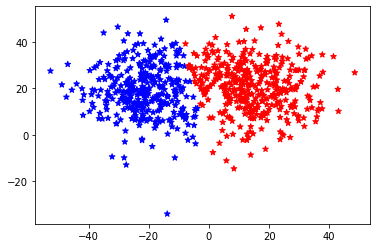

In [163]:
import matplotlib.pyplot as plt
plt.scatter(x[0,:], x[1,:], marker='*', c=color1)

In [ ]:
Layers=list()
ds=np.array([2,3,4])
temp=x
for i in range (3):
    Layers.append(hidden_layer(temp,ds[i]))
    temp=Layers[i].out() 